## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
df = pd.read_csv("data/owid-co2-data-exploration.csv")
df

,country,year,iso_code,population,primary_energy_consumption,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,co2,co2_including_luc,gdp
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,2.980,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,3.002,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,3.022,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,3.038,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,3.053,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29862,Zimbabwe,2018,ZWE,15052191.0,51.809,0.558,6.097,10.626,0.0,0.0,8.708,4.060,NaN,-0.088,10.715,19.423,2.678627e+10
29863,Zimbabwe,2019,ZWE,15354606.0,46.120,0.473,5.571,9.918,0.0,0.0,8.079,3.731,NaN,0.143,9.775,17.854,2.514642e+10
29864,Zimbabwe,2020,ZWE,15669663.0,41.997,0.496,4.309,8.668,0.0,0.0,7.609,3.045,NaN,0.818,7.850,15.459,2.317871e+10
29865,Zimbabwe,2021,ZWE,15993525.0,42.145,0.531,4.548,9.484,0.0,0.0,7.117,3.317,NaN,1.088,8.396,15.513,2.514009e+10


1. Check numerical values. Look for missing values.

In [4]:
#% for all cols
df.isna().sum()/df.shape[0]*100

country                        0.000000
year                           0.000000
iso_code                       0.000000
population                     1.429672
primary_energy_consumption    73.870827
cement_co2                    49.519537
coal_co2                      38.865638
consumption_co2               87.317106
flaring_co2                   38.684836
gas_co2                       38.684836
land_use_change_co2            5.584759
oil_co2                       38.681488
other_industry_co2            94.639569
trade_co2                     87.317106
co2                           35.299829
co2_including_luc             39.850002
gdp                           48.655707
dtype: float64

# Check top 12 countries

1. Charts co2 by year by top 12 countries

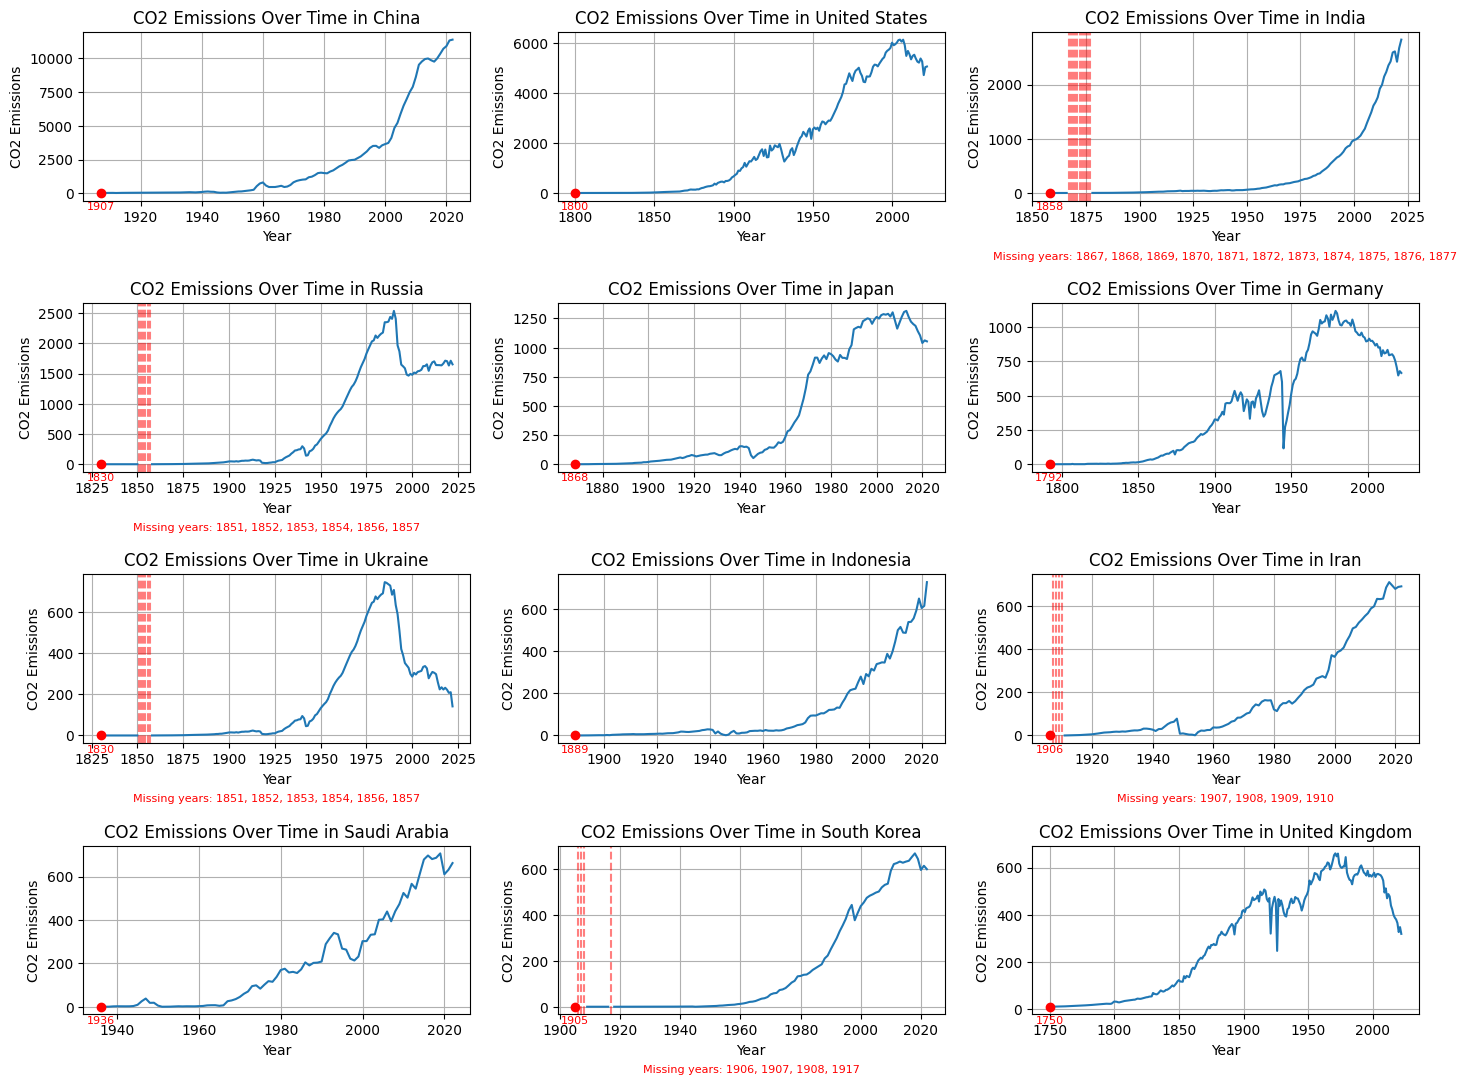

In [46]:
top_countries = df.groupby('country')['co2'].max().nlargest(12).index

num_countries = len(top_countries)
num_cols = 3  # Number of columns for the subplot grid
num_rows = (num_countries - 1) // num_cols + 1  # Calculate the number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 11), squeeze=False)


for i, country in enumerate(top_countries):
    country_df = df[df['country'] == country]
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]

    first_year_nonzero_co2 = country_df.loc[country_df['co2'] > 0, 'year'].min()
    missing_years = country_df[country_df['co2'].isnull() & (country_df['year'] > first_year_nonzero_co2)]['year']

    ax.plot(country_df['year'], country_df['co2'])
    ax.set_title(f'CO2 Emissions Over Time in {country}')
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2 Emissions')
    ax.grid(True)

    # Plotting missing years as vertical lines
    for year in missing_years:
        ax.axvline(x=year, color='r', linestyle='--', alpha=0.5)  # Vertical lines for missing years
    
    # Adding text annotation for missing years
    if not missing_years.empty:
        missing_text = f"Missing years: {', '.join(map(str, missing_years))}"
        ax.text(0.5, -0.3, missing_text, ha='center', va='top', fontsize=8, color='red', transform=ax.transAxes)

    # Adding a marker for the first year with non-zero CO2
    if not pd.isna(first_year_nonzero_co2):
        ax.scatter([first_year_nonzero_co2], [country_df.loc[country_df['year'] == first_year_nonzero_co2, 'co2'].iloc[0]], color='red', zorder=5)
        ax.annotate(first_year_nonzero_co2, xy=(first_year_nonzero_co2, country_df.loc[country_df['year'] == first_year_nonzero_co2, 'co2'].iloc[0]), xytext=(0, -12), 
                    textcoords='offset points', ha='center', fontsize=8, color='red')

plt.tight_layout()
plt.show()

In [48]:
top_countries = df.groupby('country')['co2'].max().nlargest(12).index
top_countries_df = df[(df['country'].isin(top_countries))  & (df['year'] >= 1990)].reset_index(drop=True)
top_countries_df

,country,year,iso_code,population,primary_energy_consumption,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,co2,co2_including_luc,gdp
0,China,1990,CHN,1.153704e+09,7938.249,84.513,1976.684,2320.346,0.000,29.301,1368.074,330.291,64.065,-164.509,2484.855,3852.928,3.385122e+12
1,China,1991,CHN,1.170626e+09,8337.610,101.305,2049.920,2399.879,0.000,30.778,1013.113,356.027,68.066,-206.217,2606.096,3619.209,3.508948e+12
2,China,1992,CHN,1.183813e+09,8773.708,122.445,2114.715,2575.993,0.000,30.239,1054.941,385.793,77.596,-154.794,2730.788,3785.728,3.755038e+12
3,China,1993,CHN,1.195856e+09,9457.634,142.774,2228.745,2757.112,0.000,35.728,1087.234,428.549,85.855,-164.539,2921.651,4008.885,4.126170e+12
4,China,1994,CHN,1.207287e+09,10048.812,164.377,2380.586,2750.089,3.737,41.568,1199.356,423.712,89.760,-353.650,3103.739,4303.095,4.438753e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,United States,2018,USA,3.321400e+08,26764.953,38.971,1256.631,5798.152,72.066,1619.275,108.298,2366.168,24.686,420.355,5377.797,5486.095,1.812469e+13
392,United States,2019,USA,3.343197e+08,26574.742,40.896,1071.666,5685.684,88.437,1675.471,112.161,2360.999,24.677,423.539,5262.145,5374.306,1.854055e+13
393,United States,2020,USA,3.359420e+08,24603.098,40.688,877.920,5186.558,67.749,1656.255,114.729,2047.544,24.472,471.929,4714.628,4829.357,1.802736e+13
394,United States,2021,USA,3.369976e+08,25945.025,41.312,1004.531,5572.173,63.294,1659.225,127.596,2239.014,24.837,539.960,5032.213,5159.809,1.909938e+13


In [49]:
#% for all cols
top_countries_df.isna().sum()/top_countries_df.shape[0]*100

country                        0.000000
year                           0.000000
iso_code                       0.000000
population                     0.000000
primary_energy_consumption     0.000000
cement_co2                     0.000000
coal_co2                       0.000000
consumption_co2                3.030303
flaring_co2                    0.000000
gas_co2                        0.000000
land_use_change_co2            0.000000
oil_co2                        0.000000
other_industry_co2            33.333333
trade_co2                      3.030303
co2                            0.000000
co2_including_luc              0.000000
gdp                            0.000000
dtype: float64

In [79]:
merged_df[merged_df.isnull().any(axis=1)]

,country,year,iso_code,population,primary_energy_consumption,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,co2,co2_including_luc,GDP
64,India,1990,IND,870452160.0,2300.701,22.348,366.514,575.434,9.871,21.097,173.899,158.167,NaN,-2.562,577.996,751.895,4.652428e+11
65,India,1991,IND,888941760.0,2427.663,24.503,393.043,596.786,7.834,23.563,135.573,166.423,NaN,-18.579,615.365,750.938,4.701597e+11
66,India,1992,IND,907574080.0,2552.772,25.156,411.414,646.561,3.565,27.256,166.806,188.055,NaN,-8.886,655.447,822.253,4.959357e+11
67,India,1993,IND,926351296.0,2616.248,26.602,433.121,651.937,3.701,26.996,129.925,186.879,NaN,-25.362,677.299,807.224,5.194965e+11
68,India,1994,IND,945261952.0,2757.121,28.540,455.720,683.396,1.852,28.997,118.346,198.955,NaN,-30.667,714.064,832.410,5.540894e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Saudi Arabia,2017,SAU,34193120.0,3181.819,23.998,0.550,666.199,4.352,247.624,3.677,404.330,NaN,-14.655,680.854,684.531,6.848272e+11
252,Saudi Arabia,2018,SAU,35018132.0,3101.677,25.135,0.480,658.011,4.337,257.220,3.487,399.724,NaN,-28.885,686.896,690.383,7.037437e+11
253,Saudi Arabia,2019,SAU,35827364.0,2973.287,24.604,0.513,683.149,3.949,255.934,3.502,422.126,NaN,-23.976,707.125,710.627,7.096009e+11
254,Saudi Arabia,2020,SAU,35997108.0,2890.927,25.593,0.432,614.915,4.257,261.062,3.669,319.430,NaN,4.142,610.773,614.442,6.787943e+11


In [80]:
merged_df.fillna(0, inplace=True)

In [ ]:
merged_df.to_csv('data/cleaned_data_first_model.csv', index=False)

In [5]:
df[df['population'].isna()]['country'].unique()

array(['Andorra', 'Anguilla', 'Antarctica', 'Aruba', 'Australia',
       'Bermuda', 'Bhutan', 'Bonaire Sint Eustatius and Saba',
       'British Virgin Islands', 'Brunei', 'Canada', 'Christmas Island',
       'Cook Islands', "Cote d'Ivoire", 'Curacao', 'Faroe Islands',
       'French Polynesia', 'Germany', 'Greenland', 'Guinea', 'Kosovo',
       'Macao', 'Mauritania', 'Montserrat', 'New Caledonia', 'Niue',
       'Papua New Guinea', 'Puerto Rico', 'Saint Helena',
       'Saint Pierre and Miquelon', 'Sierra Leone', 'Singapore',
       'Sint Maarten (Dutch part)', 'Turks and Caicos Islands', 'Tuvalu',
       'United Kingdom', 'Vatican', 'Wallis and Futuna'], dtype=object)

In [6]:
columns_to_check = df.columns[3:]
df[df[(df[columns_to_check] == 0) | (df[columns_to_check].isnull())].all(axis=1)]

,country,year,iso_code,population,gdp,primary_energy_consumption,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,co2,co2_including_luc
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.980,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.002,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.022,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.038,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.053,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39764,Zimbabwe,1898,ZWE,1084831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.432,NaN,NaN,NaN,NaN,NaN
39765,Zimbabwe,1899,ZWE,1097325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.501,NaN,NaN,NaN,NaN,NaN
39766,Zimbabwe,1900,ZWE,1111376.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.684,NaN,NaN,NaN,NaN,NaN
39767,Zimbabwe,1901,ZWE,1127021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.738,NaN,NaN,NaN,NaN,NaN


2. Country analysis regarding missing values and lack of data.

In [68]:
#unique countries
df_subset['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
     

In [69]:
pd.set_option('display.max_rows', None)
first_valid_index = df_subset.groupby('country')['co2'].apply(lambda x: x.first_valid_index())
first_valid_index = first_valid_index.apply(lambda x: df_subset.loc[x, 'year'] if pd.notna(x) else pd.NA)
first_valid_index

country
Afghanistan                         1949
Albania                             1933
Algeria                             1916
Andorra                             1750
Angola                              1950
Anguilla                            1990
Antarctica                          1987
Antigua and Barbuda                 1957
Argentina                           1887
Armenia                             1830
Aruba                               1926
Australia                           1750
Austria                             1807
Azerbaijan                          1860
Bahamas                             1950
Bahrain                             1933
Bangladesh                          1946
Barbados                            1928
Belarus                             1830
Belgium                             1802
Belize                              1950
Benin                               1950
Bermuda                             1950
Bhutan                              1750
Bolivia 

In [35]:
pd.reset_option('display.max_rows')

In [71]:
#all countries, where we have lack of co2 emission data
first_valid_index[first_valid_index.isna() == True]

country
Monaco         <NA>
Puerto Rico    <NA>
San Marino     <NA>
Vatican        <NA>
Name: co2, dtype: object

Delete all counties with lack of data about co2 emission.

In [72]:
for country, index in first_valid_index.items():
    if pd.isna(index):
        df_subset = df_subset.drop(df_subset.loc[df_subset['country'] == country].index)
df_subset

,country,year,iso_code,population,gdp,primary_energy_consumption,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,co2,co2_including_luc
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.980,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.002,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.022,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.038,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.053,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39884,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,51.809,0.558,6.097,10.626,0.0,0.0,8.708,4.060,NaN,-0.088,10.715,19.423
39885,Zimbabwe,2019,ZWE,15354606.0,NaN,46.120,0.473,5.571,9.918,0.0,0.0,8.079,3.731,NaN,0.143,9.775,17.854
39886,Zimbabwe,2020,ZWE,15669663.0,NaN,41.997,0.496,4.309,8.668,0.0,0.0,7.609,3.045,NaN,0.818,7.850,15.459
39887,Zimbabwe,2021,ZWE,15993525.0,NaN,42.145,0.531,4.548,9.484,0.0,0.0,7.117,3.317,NaN,1.088,8.396,15.513


3. Division of countries based on GDP

In [74]:
#Split countries

LOW_INCOME = ['Afghanistan', 'Burkina Faso', 'Burundi', 'Central African Republic', 'Chad', 'Democratic Republic of Congo', 'Eritrea', 'Ethiopia',
              'Gambia', 'Guinea-Bissau', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'North Korea', 'Rwanda', 'Sierra Leone',
              'Somalia', 'South Sudan', 'Sudan', 'Syria', 'Togo', 'Uganda', 'Yemen']

LOWER_MIDDLE_INCOME = ['Algeria', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Bolivia', 'Cambodia', 'Cameroon', 'Cape Verde', 'Comoros', 'Congo', 
                       'Cote dIvoire', 'Djibouti', 'East Timor', 'Egypt', 'Eswatini', 'Ghana', 'Guinea', 'Haiti', 'Honduras', 'India', 'Iran', 
                       'Jordan', 'Kenya', 'Kiribati', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Lesotho', 'Mauritania', 'Micronesia (country)', 'Mongolia', 
                       'Morocco', 'Myanmar', 'Nepal', 'Nicaragua', 'Nigeria', 'Pakistan', 'Papua New Guinea', 'Philippines', 'Samoa', 
                       'Sao Tome and Principe', 'Senegal', 'Solomon Islands', 'Sri Lanka', 'Tajikistan', 'Tanzania', 'Tunisia', 'Ukraine', 
                       'Uzbekistan', 'Vanuatu', 'Vietnam', 'Zambia', 'Zimbabwe']

UPPER_MIDDLE_INCOME = ['Albania', 'Argentina', 'Armenia', 'Azerbaijan', 'Belarus', 'Belize', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 
                       'Bulgaria', 'China', 'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador', 
                       'Equatorial Guinea', 'Fiji', 'Gabon', 'Georgia', 'Grenada', 'Guatemala', 'Indonesia', 'Iraq', 'Jamaica', 'Kazakhstan', 
                       'Kosovo', 'Libya', 'Malaysia', 'Maldives', 'Marshall Islands', 'Mauritius', 'Mexico', 'Moldova', 'Montenegro', 'Namibia', 
                       'North Macedonia', 'Palau', 'Palestine', 'Paraguay', 'Peru', 'Russia', 'Saint Lucia', 'Saint Vincent and the Grenadines', 
                       'Serbia', 'South Africa', 'Suriname', 'Thailand', 'Tonga', 'Turkey', 'Turkmenistan', 'Tuvalu']

HIGH_INCOME = ['Andorra', 'Antigua and Barbuda', 'Aruba', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Barbados', 'Belgium', 'Bermuda', 
               'British Virgin Islands', 'Brunei', 'Canada', 'Chile', 'Croatia', 'Curacao', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 
               'Faroe Islands', 'Finland', 'France', 'French Polynesia', 'Germany', 'Greece', 'Greenland', 'Guyana', 'Hong Kong', 'Hungary', 
               'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 
               'Malta', 'Nauru', 'Netherlands', 'New Caledonia', 'New Zealand', 'Norway', 'Oman', 'Panama', 'Poland', 'Portugal', 'Qatar', 
               'Romania', 'Saint Kitts and Nevis', 'Saudi Arabia', 'Seychelles', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 
               'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Trinidad and Tobago', 'Turks and Caicos Islands', 
               'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay']

In [75]:
low_income_df = df_subset[df_subset['country'].isin(LOW_INCOME)]
lower_middle_income_df = df_subset[df_subset['country'].isin(LOWER_MIDDLE_INCOME)]
upper_middle_income_df = df_subset[df_subset['country'].isin(UPPER_MIDDLE_INCOME)]
high_income_df = df_subset[df_subset['country'].isin(HIGH_INCOME)]

In [82]:
# low income missing values (percentage)
low_income_df.isna().sum()/low_income_df.shape[0]*100

country                         0.000000
year                            0.000000
iso_code                        0.000000
population                      0.978686
gdp                            67.768595
primary_energy_consumption     77.250979
cement_co2                     55.067421
coal_co2                       57.003045
consumption_co2                94.432362
flaring_co2                    57.003045
gas_co2                        57.003045
land_use_change_co2             2.174859
oil_co2                        57.003045
other_industry_co2            100.000000
trade_co2                      94.432362
co2                            52.609830
co2_including_luc              54.784689
dtype: float64

In [85]:
# lower middle income missing values (percentage)
filtered_df = lower_middle_income_df[lower_middle_income_df['year'] >= 1850]
filtered_df.isna().sum()/filtered_df.shape[0]*100
#lower_middle_income_df.isna().sum()/lower_middle_income_df.shape[0]*100

country                        0.000000
year                           0.000000
iso_code                       0.000000
population                     0.000000
gdp                           63.681972
primary_energy_consumption    74.642818
cement_co2                    51.314211
coal_co2                      50.583488
consumption_co2               89.180936
flaring_co2                   50.496237
gas_co2                       50.583488
land_use_change_co2            0.000000
oil_co2                       50.583488
other_industry_co2            99.640092
trade_co2                     89.180936
co2                           45.817428
co2_including_luc             45.817428
dtype: float64

In [89]:
columns_of_interest = ['population', 'gdp', 'primary_energy_consumption', 'cement_co2', 'coal_co2',
                       'consumption_co2', 'flaring_co2', 'gas_co2', 'land_use_change_co2',
                       'oil_co2', 'other_industry_co2', 'trade_co2', 'co2', 'co2_including_luc']


missing_lower_middle_income_df = lower_middle_income_df.groupby('country')[columns_of_interest].apply(lambda x: x.isna().mean() * 100)
missing_lower_middle_income_df.to_csv('missing_lower_middle_income_percentage.csv')

In [90]:
missing_high_income_df = high_income_df.groupby('country')[columns_of_interest].apply(lambda x: x.isna().mean() * 100)
missing_high_income_df.to_csv('missing_high_income_percentage.csv')

In [80]:
# upper middle income missing values (percentage)
upper_middle_income_df.isna().sum()/upper_middle_income_df.shape[0]*100

country                        0.000000
year                           0.000000
iso_code                       1.816454
population                     1.573556
gdp                           63.132327
primary_energy_consumption    76.512831
cement_co2                    53.384729
coal_co2                      42.728905
consumption_co2               90.199599
flaring_co2                   42.728905
gas_co2                       42.728905
land_use_change_co2            3.168233
oil_co2                       42.728905
other_industry_co2            97.243637
trade_co2                     90.199599
co2                           40.141514
co2_including_luc             41.693949
dtype: float64

In [79]:
# high income missing values (percentage)
high_income_df.isna().sum()/high_income_df.shape[0]*100

country                        0.000000
year                           0.000000
iso_code                       0.000000
population                    10.836260
gdp                           55.481653
primary_energy_consumption    74.336746
cement_co2                    45.661759
coal_co2                      35.184216
consumption_co2               88.184740
flaring_co2                   34.780659
gas_co2                       34.548987
land_use_change_co2           25.013078
oil_co2                       34.541514
other_industry_co2            89.985801
trade_co2                     88.184740
co2                           26.866452
co2_including_luc             44.301622
dtype: float64

6. Charts

<Axes: >

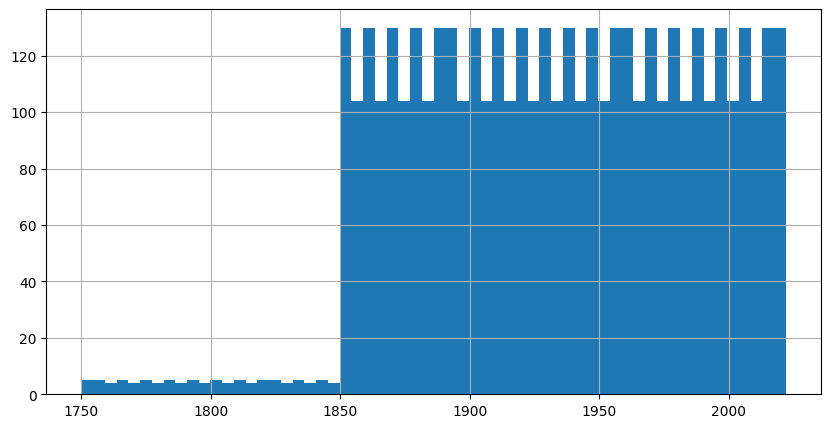

In [83]:
#How many data from different year we have - low income
low_income_df['year'].hist(bins = 60, figsize = (10,5))

<Axes: >

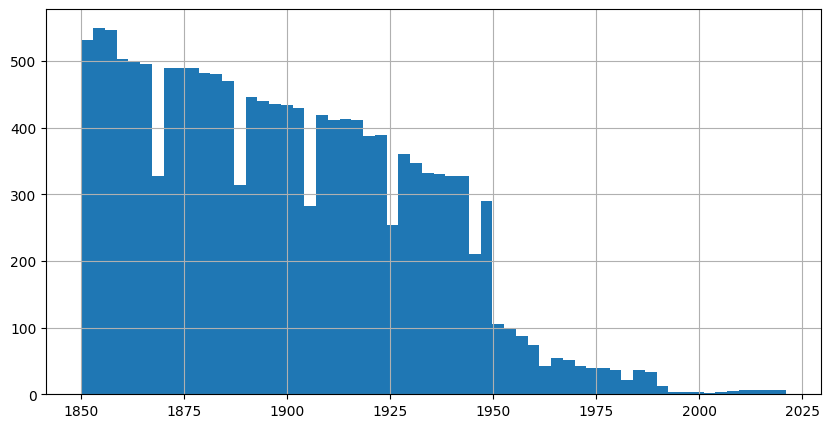

In [31]:
#How many missing values has co2 column per year
df_subset[df_subset['co2'].isna()]['year'].hist(bins = 60, figsize = (10,5))

array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'gdp'}>],
       [<Axes: title={'center': 'primary_energy_consumption'}>,
        <Axes: title={'center': 'cement_co2'}>,
        <Axes: title={'center': 'coal_co2'}>,
        <Axes: title={'center': 'consumption_co2'}>],
       [<Axes: title={'center': 'flaring_co2'}>,
        <Axes: title={'center': 'gas_co2'}>,
        <Axes: title={'center': 'land_use_change_co2'}>,
        <Axes: title={'center': 'oil_co2'}>],
       [<Axes: title={'center': 'other_industry_co2'}>,
        <Axes: title={'center': 'trade_co2'}>,
        <Axes: title={'center': 'co2'}>,
        <Axes: title={'center': 'co2_including_luc'}>]], dtype=object)

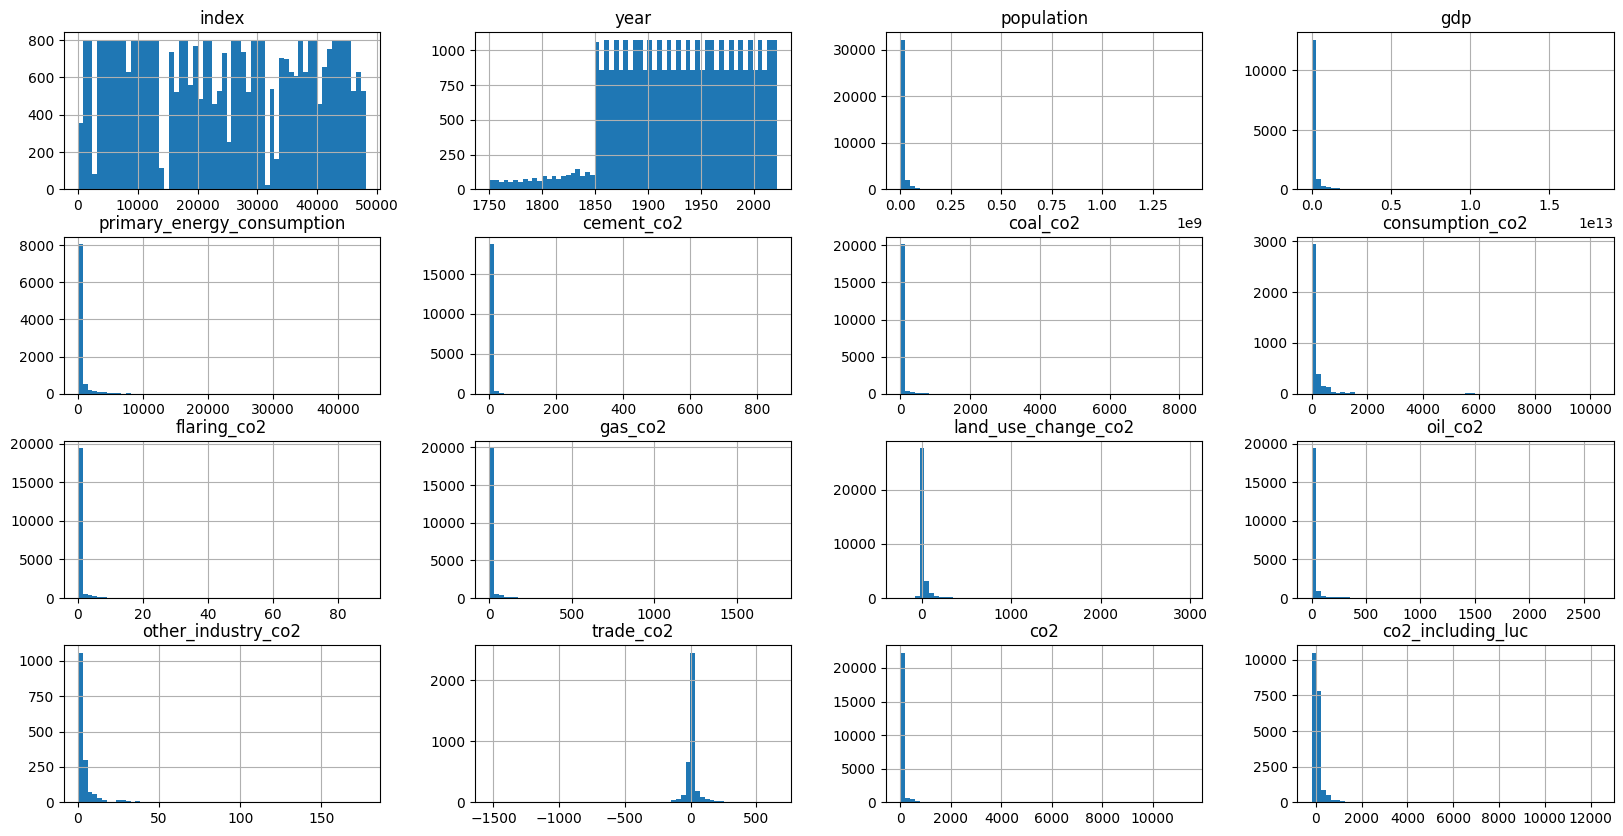

In [32]:
#General check howthe data is distributed for individual columns
df_subset.hist(bins = 60, figsize = (20,10))

In [33]:
#countries with co2 emission more than 2000 million tones
df_subset[df_subset['co2'] > 2000]['country'].value_counts() #how many years

country
United States    82
China            37
Russia           14
India             9
Name: count, dtype: int64

In [34]:
#countries with trade co2 emission more than 500 million tones (import a lot of goods)
df_subset[(df_subset['trade_co2'] > 200)]['country'].value_counts()

country
United States    22
Japan            21
Germany           3
Singapore         1
Name: count, dtype: int64

In [35]:
#countries with trade co2 emission more than 500 million tones (exports a lot of goods)
df_subset[df_subset['trade_co2'] < -200]['country'].value_counts()

country
Russia     32
China      29
India       2
Kuwait      1
Ukraine     1
Name: count, dtype: int64

In [36]:
#countries with co2 emission from other industry more than 50 million tones
df_subset[df_subset['other_industry_co2'] > 50]['country'].value_counts()

country
China    37
Name: count, dtype: int64

In [37]:
#countries with oil co2 emission more than 500 million tones
df_subset[df_subset['oil_co2'] > 500]['country'].value_counts()

country
United States    85
Japan            44
China            27
Russia           23
India             9
Name: count, dtype: int64

In [38]:
#countries with land use change co2 emission more than 1000 million tones
df_subset[df_subset['land_use_change_co2'] > 1000]['country'].value_counts()

country
United States                   64
Brazil                          62
Russia                          34
China                           18
Indonesia                       11
Democratic Republic of Congo     1
Name: count, dtype: int64

In [39]:
#countries with gas co2 emission more than 500 million tones
df_subset[df_subset['gas_co2'] > 500]['country'].value_counts()

country
United States    67
Russia           41
China             5
Name: count, dtype: int64

In [40]:
#countries with flaring co2 emission more than 20 million tones
df_subset[df_subset['flaring_co2'] > 20]['country'].value_counts()

country
United States           52
Iran                    45
Nigeria                 36
Russia                  36
Venezuela               24
Saudi Arabia            16
Iraq                    14
United Arab Emirates     7
Algeria                  4
Kuwait                   4
Libya                    3
Indonesia                2
Australia                1
Name: count, dtype: int64

In [41]:
#countries with consumption co2 emission more than 2000 million tones
df_subset[df_subset['consumption_co2'] > 2000]['country'].value_counts()

country
China            32
United States    32
India             7
Russia            2
Name: count, dtype: int64

In [42]:
#countries with coal co2 emission more than 2000 million tones
df_subset[df_subset['coal_co2'] > 2000]['country'].value_counts()

country
China            32
United States    12
Name: count, dtype: int64

In [43]:
#countries with cement co2 emission more than 200 million tones
df_subset[df_subset['cement_co2'] > 200]['country'].value_counts()

country
China    26
Name: count, dtype: int64

In [44]:
#countries with primary energy consumption co2 emission more than 10000 million tones
df_subset[df_subset['primary_energy_consumption'] > 10000]['country'].value_counts()

country
United States    58
China            29
Russia            4
India             1
Name: count, dtype: int64

In [45]:
#countries with gdp more than 0.5e13
df_subset[df_subset['gdp'] > 0.5e13]['country'].value_counts()

country
United States    48
China            23
India             9
Name: count, dtype: int64

In [46]:
#countries with population more than 0.25e9
df_subset[df_subset['population'] > 0.25e9]['country'].value_counts()

country
China            173
India            154
United States     32
Indonesia         11
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'China'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'Poland'),
  Text(5, 0, 'Russia'),
  Text(6, 0, 'United Kingdom'),
  Text(7, 0, 'United States')])

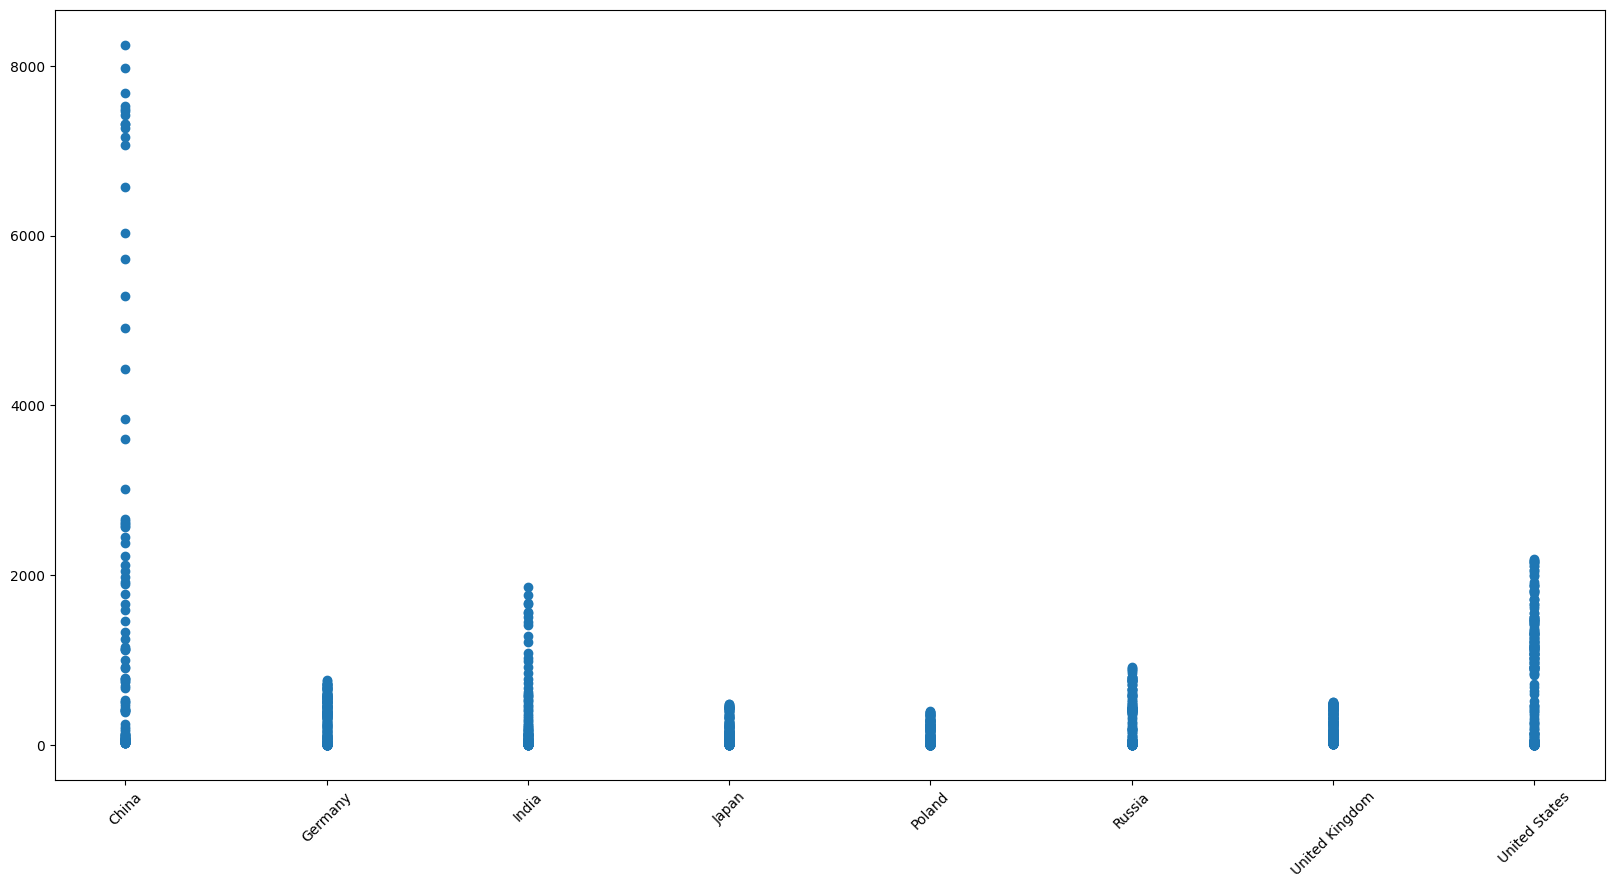

In [47]:
#Filter countries with cumulative coal_co2 greater than 20000
df_sum = df_subset.groupby('country').sum().reset_index()
df_sum = df_sum[df_sum['coal_co2'] >= 20000]

#Get the list of countries from df_sum
countries = df_sum['country'].tolist()

#Filter df_subset for countries with cumulative coal_co2 greater than 20000
df_filtered = df_subset[df_subset['country'].isin(countries)]

plt.scatter(df_filtered['country'], df_filtered['coal_co2'])
plt.gcf().set_size_inches(20, 10)  # Set figure size
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees


In [48]:
#save clean dataset into folder
df_subset.to_csv('data/owid-co2-data-clean.csv', index=False)

In [49]:
df_subset.columns

Index(['index', 'country', 'year', 'iso_code', 'population', 'gdp',
       'primary_energy_consumption', 'cement_co2', 'coal_co2',
       'consumption_co2', 'flaring_co2', 'gas_co2', 'land_use_change_co2',
       'oil_co2', 'other_industry_co2', 'trade_co2', 'co2',
       'co2_including_luc'],
      dtype='object')

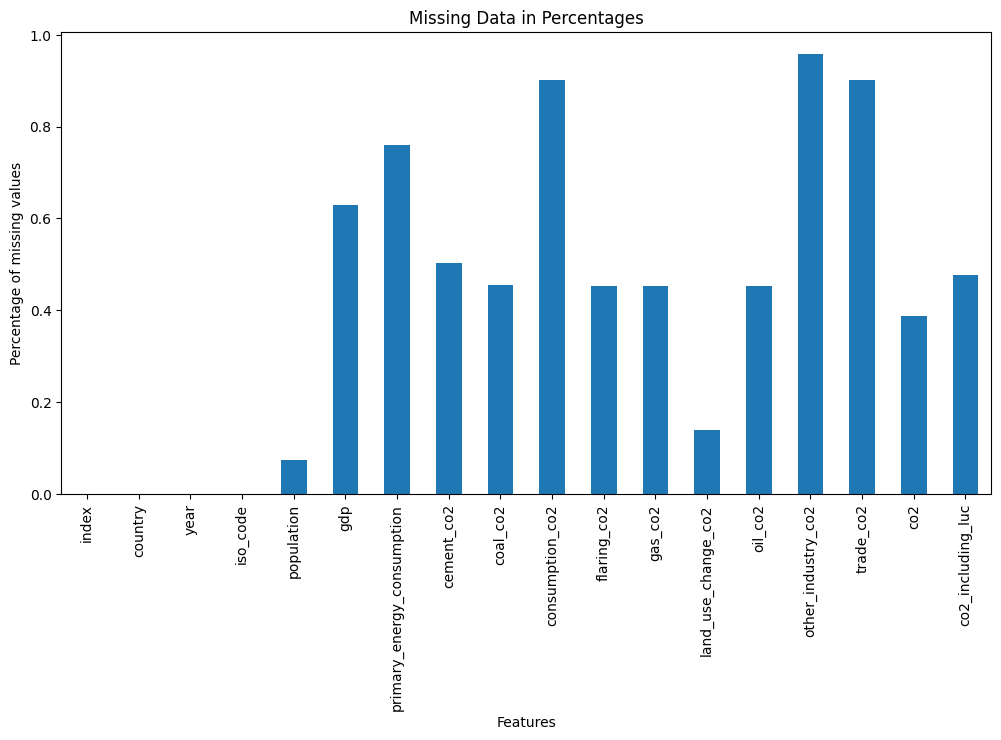

In [50]:
df_subset.isnull().mean().plot.bar(figsize=(12,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

<Axes: >

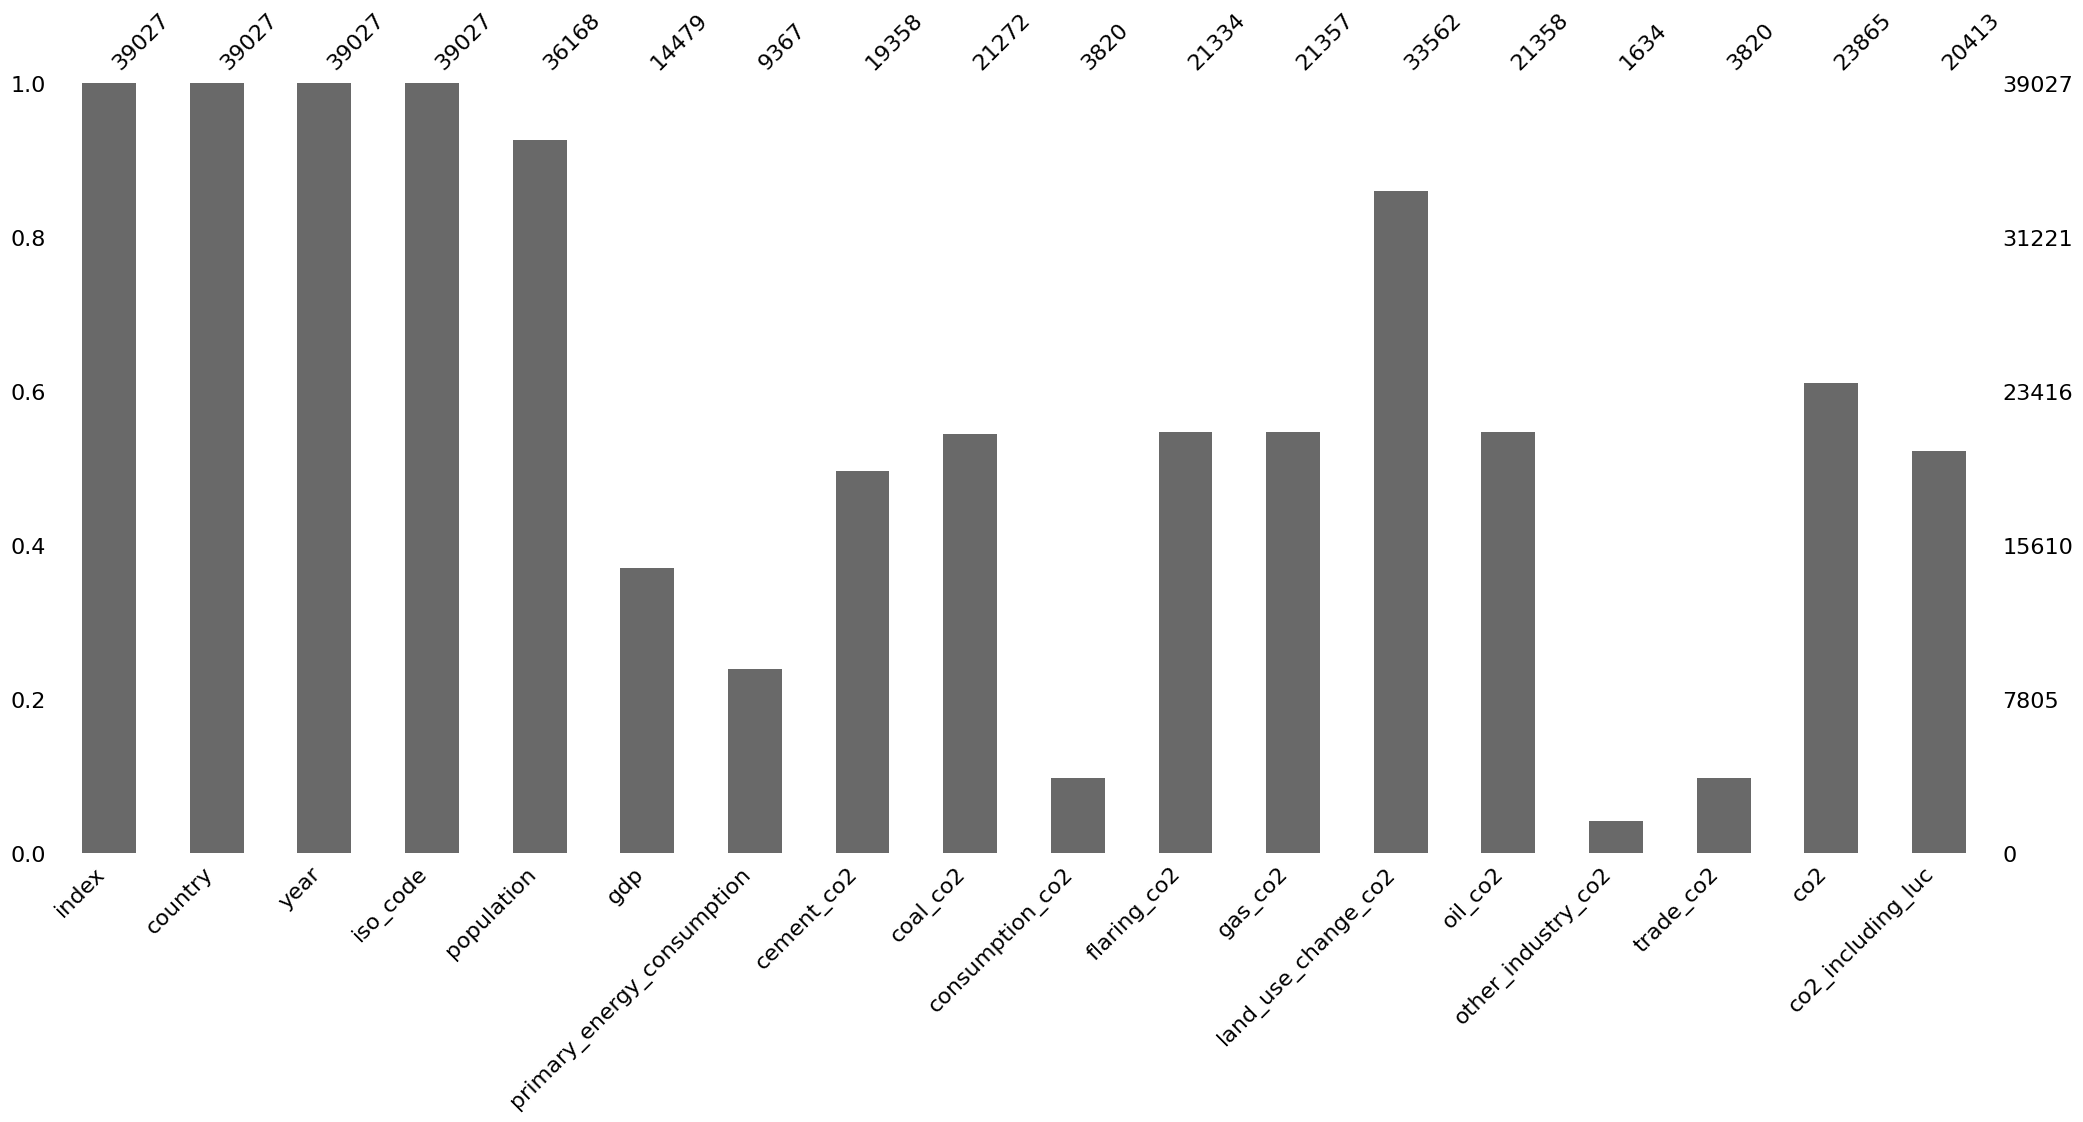

In [51]:
#Check how many missing values I have
msno.bar(df_subset)

<Axes: >

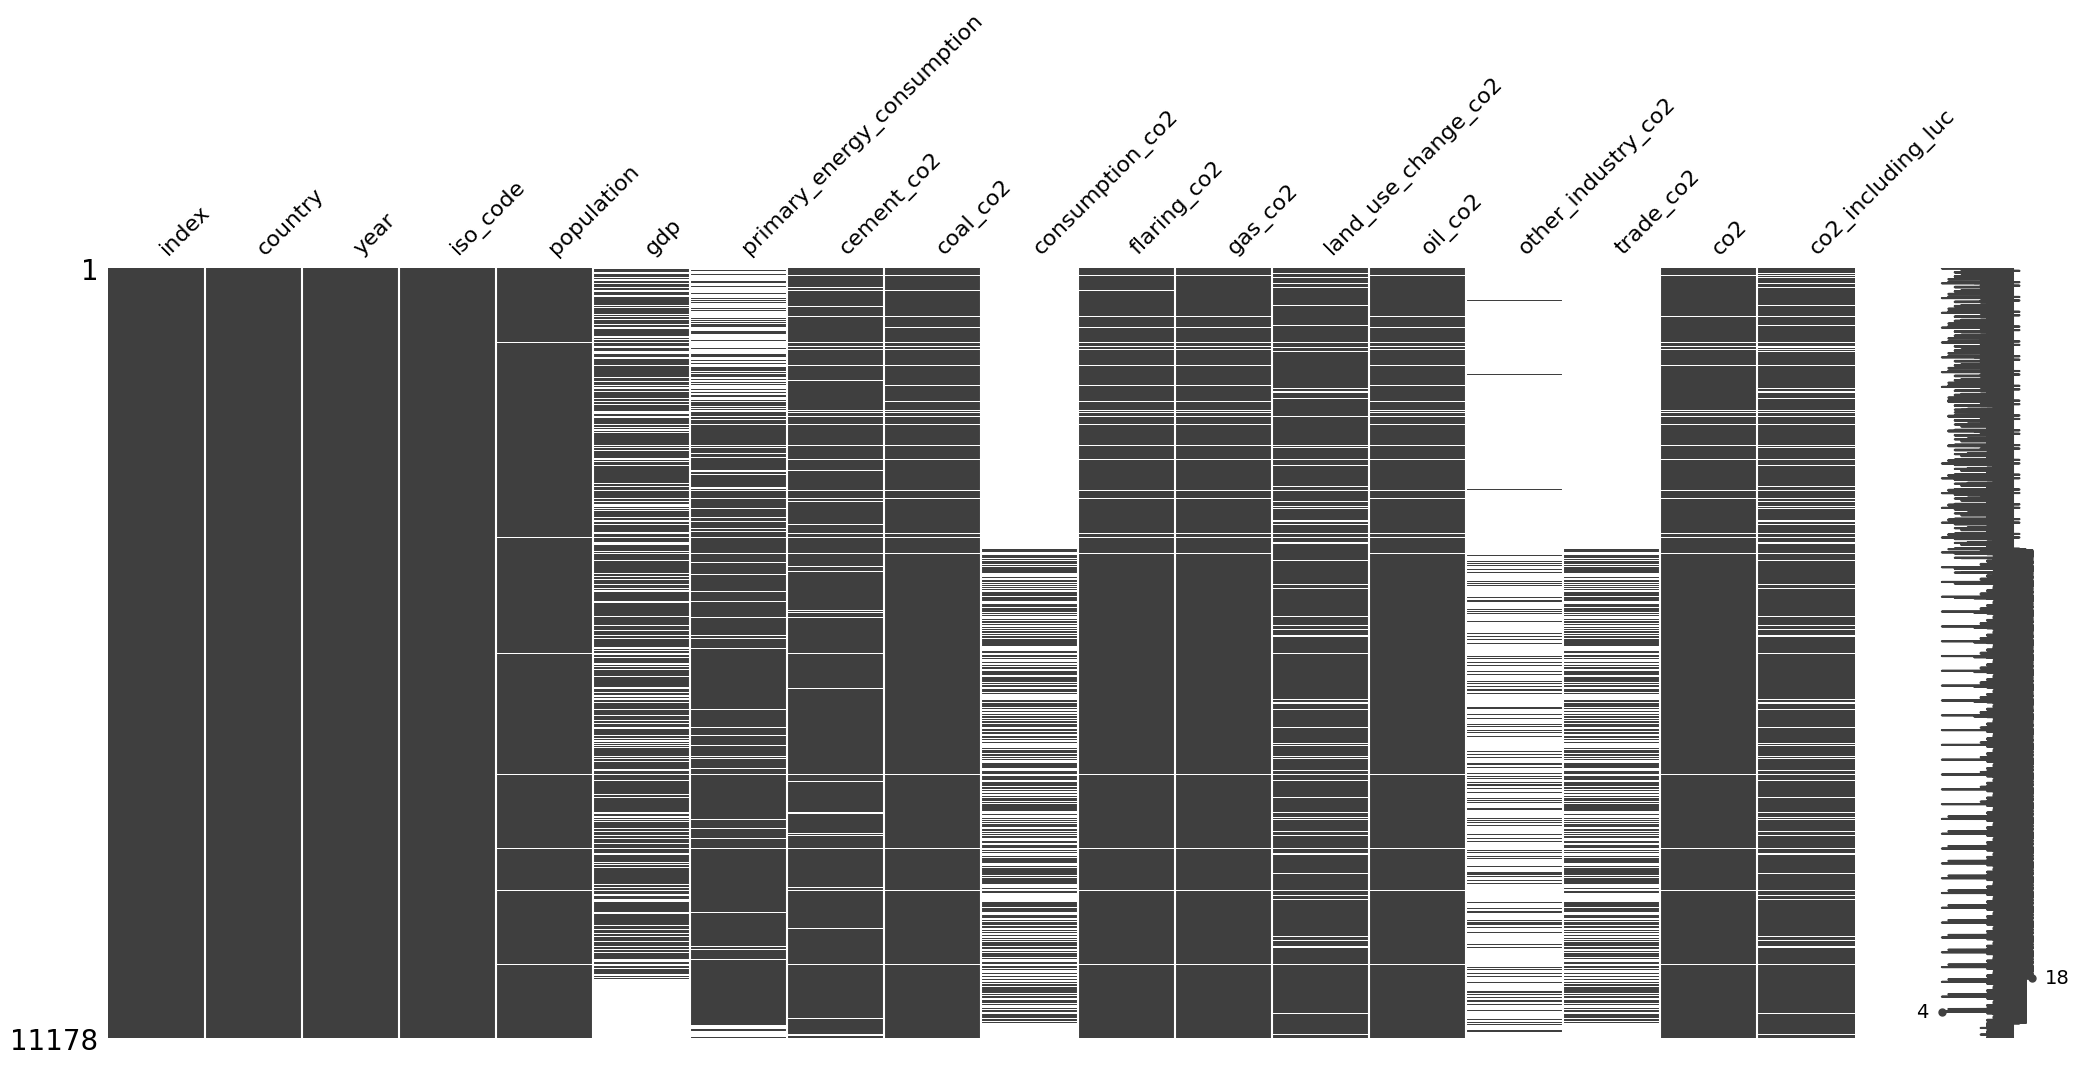

In [52]:
df_sorted = df_subset[df_subset['year'] > 1970].sort_values(by=['year', 'country'])
msno.matrix(df_sorted)

In [53]:
first_energy_consumption_year = df_sorted['primary_energy_consumption'].first_valid_index()
first_consumption_co2_year = df_sorted['consumption_co2'].first_valid_index()
first_other_industry_co2_year = df_sorted['other_industry_co2'].first_valid_index()
first_trade_co2_year = df_sorted['trade_co2'].first_valid_index()

print("Primary_energy_consumption: ", df_sorted.loc[first_energy_consumption_year, 'year'])
print("Consumption_co2: ", df_sorted.loc[first_consumption_co2_year, 'year'])
print("Other_industry_co2: ", df_sorted.loc[first_other_industry_co2_year, 'year'])
print("Trade_co2: ", df_sorted.loc[first_trade_co2_year, 'year'])

Primary_energy_consumption:  1971
Consumption_co2:  1990
Other_industry_co2:  1971
Trade_co2:  1990
